<a href="https://colab.research.google.com/github/Deolinda1506/Databases_Prediction_Pipeline_G4/blob/main/Task3/Car_Price_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Task 3 - Predict Car Price Category with Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Automobile_data (1).csv'

# Load the data
data = pd.read_csv(file_path)

# Display the first 10 rows
print(data.head(10))



Mounted at /content/drive
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  co

In [5]:

### Check for basic information about the data

print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')
print(f'Data types: \n{data.dtypes}')
print(f'Descriptive statistics: \n{data.describe()}')
print(f'Unique values: \n{data.nunique()}')
print(f'Missing values: \n{data.isnull().sum()}')
print(f'Data Information: \n{data.info()}')

Number of rows: 205
Number of columns: 26
Data types: 
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
Descriptive statistics: 
        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834

In [6]:
# Handle missing values
# Replace '?' with NaN
data.replace("?", np.nan, inplace=True)

# Convert relevant columns to numeric, coercing errors
numerical_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Impute numerical columns with the mean
for col in numerical_cols:
    if data[col].isnull().any():
        mean_val = data[col].mean()
        data[col].fillna(mean_val, inplace=True)

# Impute categorical columns with the mode
categorical_cols = ['num-of-doors']
for col in categorical_cols:
    if data[col].isnull().any():
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


/tmp/ipython-input-6-2428670592.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-6-2428670592.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [7]:
# Categorize the price into three categories: Low, Medium, High
data['price_category'] = pd.qcut(data['price'], q=3, labels=['Low', 'Medium', 'High'])

# Drop the original 'price' column
data.drop('price', axis=1, inplace=True)

print(data[['price_category']].head())

  price_category
0         Medium
1           High
2           High
3           High
4           High


In [8]:
# Select features
X = data.drop('price_category', axis=1)
y = data['price_category']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (164, 65)
Shape of X_test: (41, 65)
Shape of y_train: (164,)
Shape of y_test: (41,)


In [9]:
# Build and Train the Random Forest model
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

        High       0.56      1.00      0.72         9
         Low       0.88      0.93      0.90        15
      Medium       0.89      0.47      0.62        17

    accuracy                           0.76        41
   macro avg       0.78      0.80      0.75        41
weighted avg       0.81      0.76      0.74        41


Confusion Matrix:


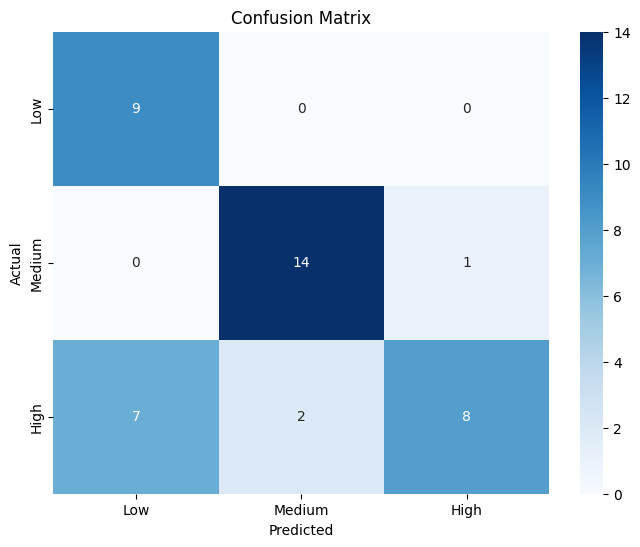

In [27]:
# Evaluate the model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the trained model to Google Drive
pickle.dump(model, open('/content/drive/MyDrive/random_forest_car_price_model.pkl', 'wb'))

print("Model saved to /content/drive/MyDrive/random_forest_car_price_model.pkl")